<a href="https://colab.research.google.com/github/GustavoHSilva07/RECUPERA-O-DA-INFORMA-O-NA-WEB-E-EM-REDES-SOCIAIS/blob/main/Trilha_6_Histograma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TRILHA 6: TAREFA**

Escolha uma corpora de documentos correlatos e extraia as suas principais palavras e apresente um histograma.

Por favor enviar:

1. Uma página no Word descrevendo suscintamente o projeto escolhido e os resultados obtidos.
  
  O projeto trata-se da recuperação das informações disponíveis pelo professor no arquivo "UolBlogs.json" e dentro desse arquivo filtrado os textos do Mauricio Stycer através da criação de Data Frame.
  
  Foi realizado os tratamentos habituais (transformação de todas as palavras em minusculas, remoção de palavras de parada, remoção de pontuação e etc) do processamento de linguagem natural e criado histograma para verificar a frequencia de palavras nos textos. Por fim foi criado um dicionário com as palavras e sua frequência.

2. Para o caso de usar a base de dados disponibilizada pelo professor, explicar qual caso escolhido e reenviar a base de dados.
  
  Foi escolhido o arquivo "UolBlogs.json" e dentro desse arquivo filtrado os textos do Mauricio Stycer. O arquivo foi carregado no Github no link: https://github.com/GustavoHSilva07/RECUPERA-O-DA-INFORMA-O-NA-WEB-E-EM-REDES-SOCIAIS

3. O programa em python (ou caderno do Jupyter) com o código com comentários.

  Segue abaixo.

In [22]:
#Importando bibliotecas
import pandas as pd
from bs4 import BeautifulSoup
import requests
import json
import nltk
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
#Foi necessário instalar o unidecode com o comando abaixo
!pip install unidecode
from unidecode import unidecode

In [23]:
dados = json.load(open('UolBlogs.json', 'r')) #Importando a base disponibilizada pelo professor e carregada na pasta local do colab
# Recuperando os textos do autor Mauricio Stycer
texto = []
for grupo in dados:
    if 'Mauricio Stycer' in grupo['author']:
        texto.append(grupo)

texto_df = pd.DataFrame(texto) #Criando DF com as palavras dos textos do autor

In [24]:
# Baixando palavras de parada
nltk.download('stopwords')
stop = stopwords.words('portuguese')

#Tratamentos dos dados
texto_df['content'] = texto_df['content'].str.lower().apply(lambda x:unidecode(x)) #Transformando em minuscula e removendo acentos
texto_df['content'] = texto_df['content'].apply(lambda x: ' '.join([w for w in x.split() if w not in (stop)])) #Retirando palavras de parada
texto_df['content'] = texto_df['content'].str.replace('[{}]'.format(string.digits),'') #Retirando os numeros
texto_df['content'] = texto_df['content'].str.replace('[{}]'.format(string.punctuation),'') #Retirando pontuação
display(texto_df)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,author,title,content
0,Mauricio Stycer,Globoplay fará documentário sobre escândalo da...,escandalo prevent senior mudou rumo cobertura ...
1,Mauricio Stycer,"Espanhola acusa Lula e PT de elo com tráfico, ...",jornal record divulgou neste sabado entrevist...
2,Mauricio Stycer,"Em entrevista com banqueiro, Bial iguala Lula ...",exibida madrugada dia entrevista pedro bial e...
3,Mauricio Stycer,Jovem Pan anuncia estreia de canal de notícias...,comunicacao divulgada proprio portal jovem pan...
4,Mauricio Stycer,Damares cita série da Netflix ao propor revisã...,governo bolsonaro planeja rever politica class...
...,...,...,...
543,Mauricio Stycer,Quem vê A Fazenda só tem duas opções: ser a fa...,previsivel ocorresse demorou assim confirmada ...
544,Mauricio Stycer,"A Fazenda : Rodrigo deve sair, e é o mais just...",disputando roca raissa biel rodrigo merece sai...
545,Mauricio Stycer,"Criticado por fãs, Mion culpa diretor da Fazen...",apresentador marcos mion nao gostou criticas r...
546,Mauricio Stycer,"Ainda mal em SP, SBT tem vitória importante no...",ainda dando primeiros passos projeto transmiss...


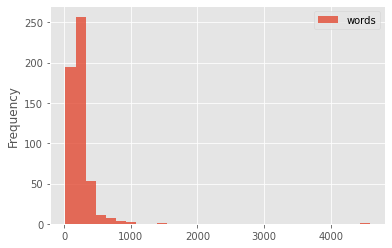

In [25]:
#Faz a contagem de palavras por cada linha do artigo
texto_df['words']=texto_df['content'].str.split().str.len()

#Elimina qualquer artigo que tenha gerado menos de 20 letras
texto_df=texto_df.loc[(texto_df['words']>20)]

#Plota o data frame em histograma para uma avaliação
texto_df.plot.hist(bins=30, alpha=0.8)

In [26]:
# Contando palavras
text_all = ""

for i in texto_df['content']:
    text_all = text_all + i
    
listadepalavras = text_all.split()

palavras = {}
for i in listadepalavras:
    palavras[i] = listadepalavras.count(i)

print(palavras)

{'escandalo': 4, 'prevent': 5, 'senior': 5, 'mudou': 25, 'rumo': 7, 'cobertura': 73, 'jornalistica': 15, 'sobre': 649, 'pandemia': 191, 'covid': 114, 'sera': 125, 'tema': 34, 'documentario': 36, 'globoplay': 60, 'programado': 8, 'exibicao': 65, 'ainda': 398, 'ano': 272, 'dezembro': 42, 'projeto': 108, 'segundo': 242, 'coluna': 92, 'apurou': 13, 'tocado': 1, 'mesma': 72, 'equipe': 81, 'ja': 433, 'realizou': 2, 'dois': 247, 'documentarios': 4, 'plataforma': 39, 'streaming': 69, 'globo': 805, 'a': 246, 'corrida': 4, 'vacinas': 18, 'mercado': 66, 'paralelo': 10, 'ambos': 22, 'dirigidos': 1, 'jornalista': 142, 'alvaro': 6, 'pereira': 13, 'junior': 15, 'roteiro': 22, 'gabriel': 10, 'mitani': 1, 'novo': 135, 'visto': 25, 'internamente': 9, 'terceira': 24, 'parte': 136, 'desta': 190, 'serie': 123, 'duracao': 6, 'nao': 2404, 'definida': 4, 'primeiro': 180, 'seis': 53, 'episodios': 35, 'alem': 122, 'caso': 144, 'revelado': 7, 'guilherme': 17, 'balza': 1, 'tambem': 566, 'vai': 321, 'participar': 